# **Importamos librerias**

In [ ]:
from datetime import datetime
import numpy as np
import pandas as pd
from pandas.plotting import scatter_matrix
import pandas_datareader as web
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("fivethirtyeight")

Agregamos:

 * Los tickers del portfolio, en este caso **tecnológicas de mejor rendimiento** "FAANG"
 * Fecha de inicio del analisis
 * Fecha de fin del analisis







In [ ]:
#Stocks FAANG
#stocksSymbol = ["FB", "AMZN", "AAPL", "NFLX", "GOOG"]

#Stocks ARGY - ADR´s que suman el 85% del volumen total operado en EEUU
#stocksSymbol = ["TS", "YPF", "GGAL", "SUPV", "MELI", "BBAR", "DESP", "GLOB", "BMA", "LOMA"]

#Stocks ARGY - ADR´s que suman el 85% del volumen total operado en EEUU - sin MELI y GLOBANT
stocksSymbol = ["TS", "YPF", "GGAL", "SUPV", "BBAR", "DESP", "BMA", "LOMA"]


stockStartDate = "2013-01-01"

today = datetime.today().strftime('%Y-%m-%d')

print(today)

2020-11-16


In [ ]:
#Revisamos el número de recursos
numAssets = len(stocksSymbol)
print(numAssets)

8


In [ ]:
#Creamos funcion para conseguir los valores del portfolio en análisis

def getMyPortfolio(stocks = stocksSymbol, start = stockStartDate, end = today, col = 'Adj Close'):
  data = web.DataReader(stocks, data_source='yahoo', start=start, end=end)[col]
  return data

In [ ]:
#conseguimos los valores
my_stocks = getMyPortfolio(stocksSymbol)
my_stocks

Symbols,TS,YPF,GGAL,SUPV,BBAR,DESP,BMA,LOMA
Date,,,,,,,,
2013-01-02,33.925854,14.272881,6.755491,NaN,4.808447,NaN,16.702700,NaN
2013-01-03,33.481972,14.215559,6.669373,NaN,4.780918,NaN,16.369524,NaN
2013-01-04,33.656353,14.206006,6.602392,NaN,4.689154,NaN,15.992506,NaN
2013-01-07,32.681385,14.282434,6.506705,NaN,4.762565,NaN,16.378290,NaN
2013-01-08,32.292980,14.998943,6.401450,NaN,4.689154,NaN,15.974970,NaN
...,...,...,...,...,...,...,...,...
2020-11-10,13.020000,4.750000,8.800000,2.120,3.340000,9.46,16.370001,4.56
2020-11-11,12.990000,4.580000,8.300000,1.990,3.210000,9.64,15.690000,5.15
2020-11-12,13.100000,4.320000,7.910000,1.860,2.940000,8.73,14.640000,4.89


In [ ]:
#Creamos funcion para visualizar el porfolio
def showGraph(stocks = stocksSymbol, start = stockStartDate, end = today, col= 'Adj Close'):

  #creamos titulo para el porfolio
  title = 'Portfolio '+col+' Price History'

  #llamamos los stocks
  my_stocks = getMyPortfolio(stocks = stocks, start=start, end=end, col=col)

  #detallamos la figura
  plt.figure(figsize=(12.2, 4.5))

  #loopeamos sobre cada stock para graficar el valor
  for c in my_stocks.columns.values:
    plt.plot( my_stocks[c], label = c)

  plt.title(title)
  plt.xlabel('date', fontsize = 18)
  plt.ylabel(col+'Price USD ($)')
  plt.legend(my_stocks.columns.values, loc = 'upper_left')
  plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: MatplotlibDeprecationWarning: Unrecognized location 'upper_left'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.


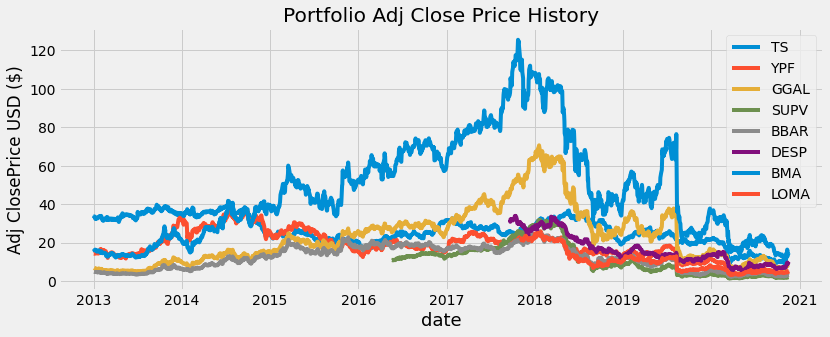

In [ ]:
#Mostramos la evolución de los precios del portfolio
showGraph(stocksSymbol)


In [ ]:
#Veamos la variación diaria del valor
daily_simple_return = my_stocks.pct_change(1)

daily_simple_return

Symbols,TS,YPF,GGAL,SUPV,BBAR,DESP,BMA,LOMA
Date,,,,,,,,
2013-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-01-03,-0.013084,-0.004016,-0.012748,NaN,-0.005725,NaN,-0.019947,NaN
2013-01-04,0.005208,-0.000672,-0.010043,NaN,-0.019194,NaN,-0.023032,NaN
2013-01-07,-0.028968,0.005380,-0.014493,NaN,0.015655,NaN,0.024123,NaN
2013-01-08,-0.011885,0.050167,-0.016176,NaN,-0.015414,NaN,-0.024625,NaN
...,...,...,...,...,...,...,...,...
2020-11-10,-0.007622,0.147343,0.087763,0.092783,0.087948,0.011765,0.089880,0.034014
2020-11-11,-0.002304,-0.035789,-0.056818,-0.061321,-0.038922,0.019028,-0.041539,0.129386
2020-11-12,0.008468,-0.056769,-0.046988,-0.065327,-0.084112,-0.094398,-0.066922,-0.050485


In [ ]:
#Observemos la correlación entre ellos
print(daily_simple_return.corr())


Symbols        TS       YPF      GGAL  ...      DESP       BMA      LOMA
Symbols                                ...                              
TS       1.000000  0.442072  0.310307  ...  0.396309  0.299071  0.285339
YPF      0.442072  1.000000  0.645276  ...  0.440325  0.615796  0.615802
GGAL     0.310307  0.645276  1.000000  ...  0.390271  0.869547  0.730229
SUPV     0.310824  0.629365  0.843463  ...  0.343998  0.811773  0.707883
BBAR     0.315940  0.620176  0.854305  ...  0.358667  0.841948  0.715690
DESP     0.396309  0.440325  0.390271  ...  1.000000  0.379139  0.353443
BMA      0.299071  0.615796  0.869547  ...  0.379139  1.000000  0.706468
LOMA     0.285339  0.615802  0.730229  ...  0.353443  0.706468  1.000000

[8 rows x 8 columns]


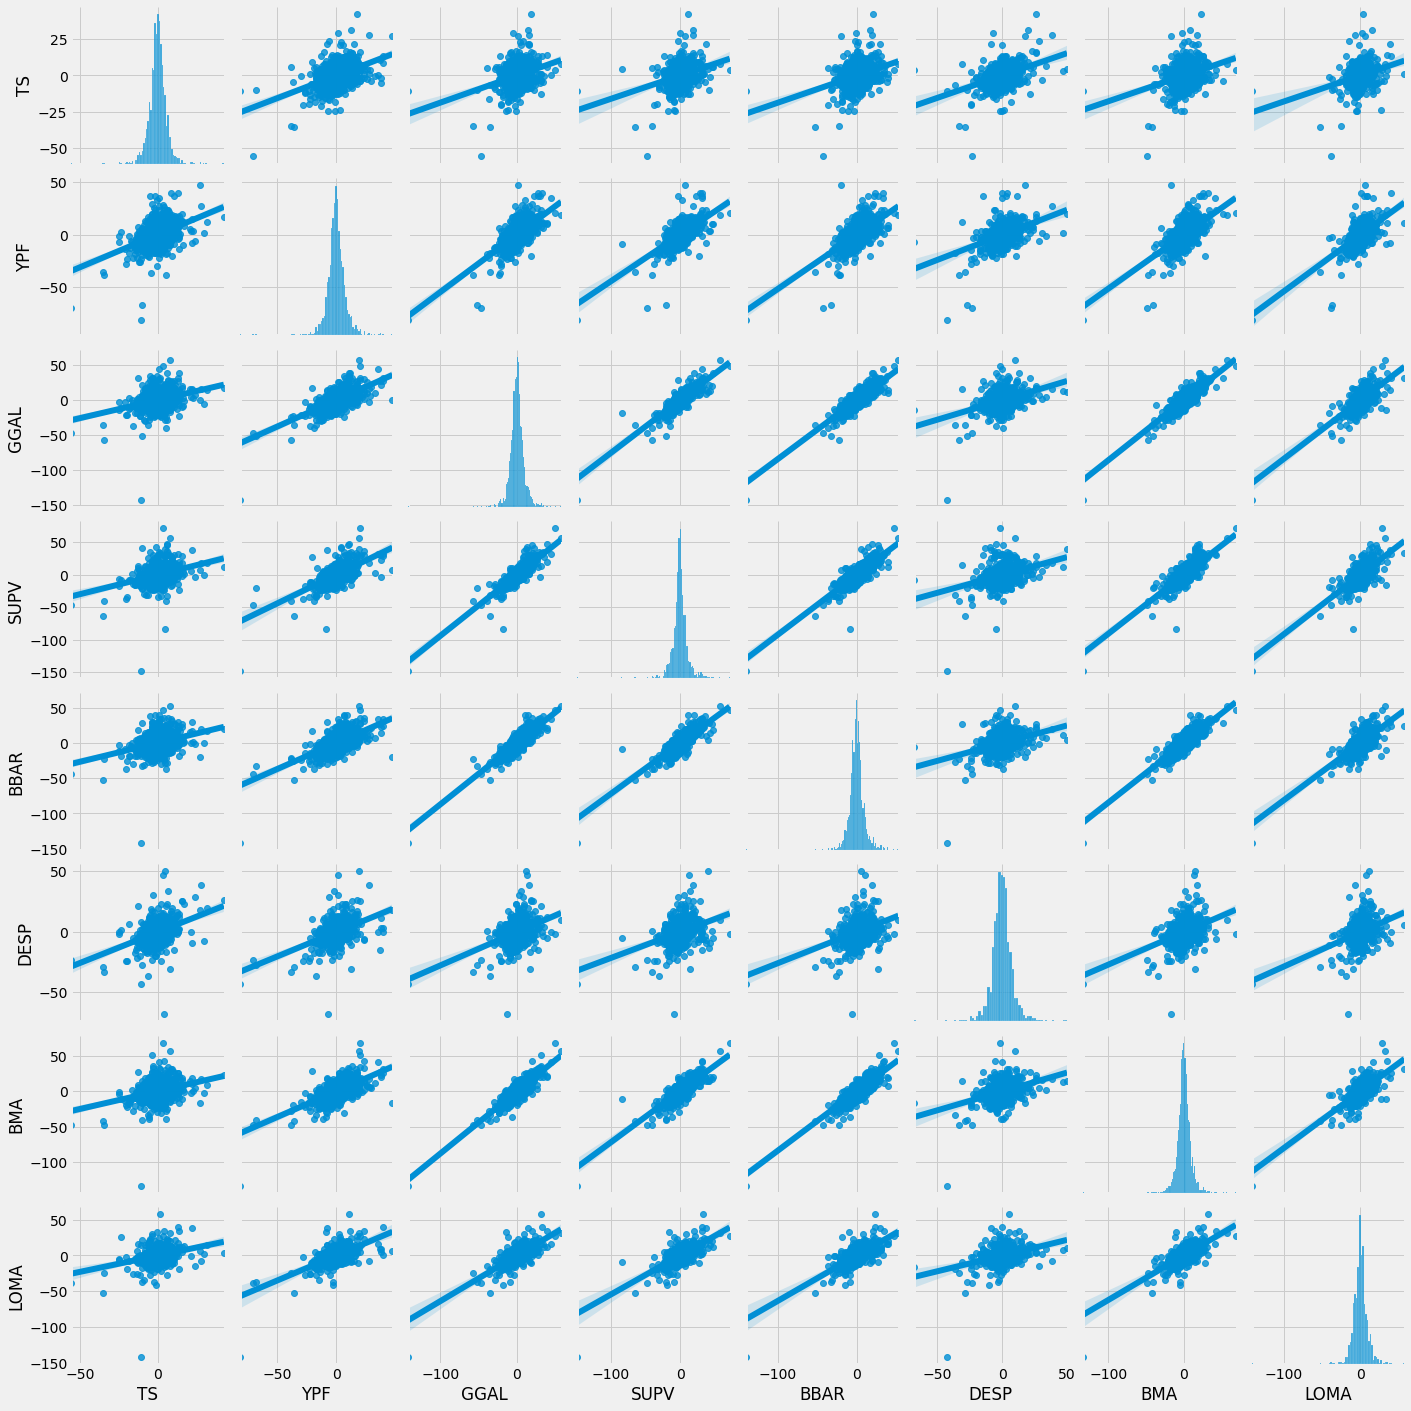

In [ ]:
#1. Graficamos la correlación entre retorno anual de los activos
anualreturn = daily_simple_return*253
# scatter_matrix((anualreturn), figsize=(16,12), alpha=0.3)
sns.pairplot(anualreturn, kind="reg")
plt.show()


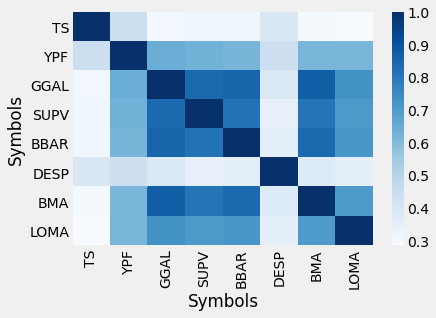

In [ ]:
#2. Graficamos la correlación entre retorno  anual de los activos en un mapa de calor.
sns.heatmap(anualreturn.corr(), cmap="Blues")

In [ ]:
#Observemos la covarianza entre ellos
daily_simple_return.cov()

Symbols,TS,YPF,GGAL,SUPV,BBAR,DESP,BMA,LOMA
Symbols,,,,,,,,
TS,0.000506,0.000315,0.000260,0.000361,0.000270,0.000366,0.000253,0.000337
YPF,0.000315,0.001001,0.000761,0.000991,0.000744,0.000567,0.000734,0.001011
GGAL,0.000260,0.000761,0.001389,0.001679,0.001208,0.000655,0.001220,0.001565
SUPV,0.000361,0.000991,0.001679,0.002221,0.001603,0.000652,0.001603,0.001714
BBAR,0.000270,0.000744,0.001208,0.001603,0.001439,0.000594,0.001202,0.001516
DESP,0.000366,0.000567,0.000655,0.000652,0.000594,0.001183,0.000630,0.000533
BMA,0.000253,0.000734,0.001220,0.001603,0.001202,0.000630,0.001418,0.001497
LOMA,0.000337,0.001011,0.001565,0.001714,0.001516,0.000533,0.001497,0.001869


In [ ]:
#Observamos la varianza de los activos
daily_simple_return.var()

Symbols
TS      0.000506
YPF     0.001001
GGAL    0.001389
SUPV    0.002221
BBAR    0.001439
DESP    0.001183
BMA     0.001418
LOMA    0.001869
dtype: float64

In [ ]:
#Imprimimos el desvio standard de los retornos diarios para revisar la volatilidad
print('Volatilidad de los activos')
daily_simple_return.std()

Volatilidad de los activos


Symbols
TS      0.022499
YPF     0.031641
GGAL    0.037267
SUPV    0.047123
BBAR    0.037931
DESP    0.034400
BMA     0.037653
LOMA    0.043237
dtype: float64

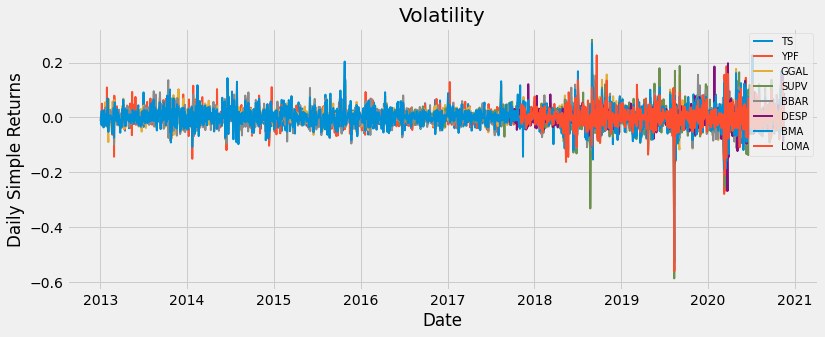

In [ ]:
#Visualizamos la volatilidad de los activos
plt.figure(figsize=(12,4.5))

#loopeamos a cada activo y ploteamos la variación diaria
for c in daily_simple_return.columns.values:
  plt.plot(daily_simple_return[c], lw=2, label = c)

#definimos las leyendas
plt.legend(loc = 'upper right', fontsize = 10)
plt.title('Volatility')
plt.ylabel('Daily Simple Returns')
plt.xlabel('Date')
plt.show()

In [ ]:
# veamos la variación diaria promedio del porfolio
dailyMeanSimpleReturns = daily_simple_return.mean()

print('La variación media diaria:')
print(dailyMeanSimpleReturns)

La variación media diaria:
Symbols
TS     -0.000169
YPF    -0.000044
GGAL    0.000846
SUPV   -0.000292
BBAR    0.000557
DESP   -0.000857
BMA     0.000699
LOMA   -0.000791
dtype: float64


In [ ]:
#Calculamos el retorno diario esperado del porfolio

randomWeights = np.array([0.4, 0.1, 0.3, 0.1, 0.1]) #40% FB, 10% AMZN, 30% AAPL, 10% NFLX, 10% GOOG

portfolioSimpleReturn = np.sum(dailyMeanSimpleReturns * randomWeights)

#argyportfolioSimpleReturn = np.sum(dailyMeanSimpleReturns)

print("El retorno diario esperado:" + str(portfolioSimpleReturn))

#print("El retorno diario esperado:" + str(argyportfolioSimpleReturn))

ValueError: ignored

In [ ]:
#Calculamos el retorno anual esperado

print("Retorno anual esperado " + str(portfolioSimpleReturn * 253))

#print("Retorno anual esperado " + str(argyportfolioSimpleReturn * 253))

In [ ]:
#Veamos el retorno anual acumulado

dailyCumuSimpleReturn = (daily_simple_return+1).cumprod()

dailyCumuSimpleReturn

In [ ]:
#Graficamos como se acumula diariamente el retorno de inversión

plt.figure(figsize = (12.2, 4.5))
for c in dailyCumuSimpleReturn.columns.values:
  plt.plot(dailyCumuSimpleReturn.index, dailyCumuSimpleReturn[c], lw =2, label =c )

plt.legend(loc = 'upper left', fontsize = 10)
plt.xlabel('date')
plt.ylabel('Growth of $1 investment')
plt.title('Daily Cumulative Simple Return')
plt.show()